In [1]:
import string
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np
import xgboost as xgb

In [2]:
data = pd.read_csv("Salinan dari TAGS v6.1.9.1 - Archive (33).csv", sep=',', encoding='utf=8')
data.head()

,Tweets,class
0,sampe lupa cara bikin application letter dong....,Negatif
1,gw ngakakin ini sampe bego https://t.co/xP3o5o...,Negatif
2,@dostoyevzky apseh bg oloap :v,Positif
3,taro singing any song in the bg ma he's adorable,Positif
4,@NagleKara @yeetwheat99 @QEDmostly @BillKristo...,Positif


In [3]:
# proses case folding
import re 
def casefolding(Tweets):
    Tweets = Tweets.lower()
    Tweets = Tweets.strip(" ")
    Tweets = re.sub(r'(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)', '', Tweets)
    return Tweets 
data['Tweets'] = data['Tweets'].apply(casefolding)
data.head(1000)

,Tweets,class
0,sampe lupa cara bikin application letter dong ...,Negatif
1,gw ngakakin ini sampe bego,Negatif
2,apseh bg oloap v,Positif
3,taro singing any song in the bg ma hes adorable,Positif
4,this marine blocked me lmfao,Positif
...,...,...
994,aku juga bisa koq aku doakan semoga yahya wal...,Negatif
995,kalo lucu sih aku ora seng anjing sangarr yo ...,Positif
996,sarah 1st timer di nasi lemak anjing vs tangan...,Positif
997,bisaa lo bayangin gw ada kucing sama anjing d...,Positif


In [4]:
# proses tokenizing 
def token(Tweets):
    nstr = Tweets.split(' ')
    dat = []
    a = -1 
    for hu in nstr:
        a = a + 1 
    if hu == '': 
        dat.append(a)
    p = 0 
    b = 0
    for q in dat:
        b = q - p 
        del nstr [b]
        p = p + 1 
    return nstr 
data['Tweets'] = data['Tweets'].apply(token)
data.head(1000)

,Tweets,class
0,"[sampe, lupa, cara, bikin, application, letter...",Negatif
1,"[gw, ngakakin, ini, sampe, bego]",Negatif
2,"[, apseh, bg, oloap, v]",Positif
3,"[taro, singing, any, song, in, the, bg, ma, he...",Positif
4,"[, , , , this, marine, blocked, me, lmfao]",Positif
...,...,...
994,"[, aku, juga, bisa, koq, aku, doakan, semoga, ...",Negatif
995,"[, kalo, lucu, sih, aku, ora, seng, anjing, sa...",Positif
996,"[sarah, 1st, timer, di, nasi, lemak, anjing, v...",Positif
997,"[, bisaa, lo, bayangin, gw, ada, kucing, sama,...",Positif


In [5]:
# proses filtering 
import nltk 
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
nltk.download('stopwords')
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords 

def stopword_removal(Tweets): 
    filtering = stopwords.words('indonesian','english')
    x = []
    data = []
    def myFunc(x): 
        if x in filtering: 
            return False 
        else:
            return True 
    fit = filter(myFunc, Tweets)
    for x in fit: 
        data.append(x)
    return data
data['Tweets'] = data['Tweets'].apply(stopword_removal)
data.head(1000)

[nltk_data] Error loading stopwords: <urlopen error [WinError 10054]
[nltk_data]     An existing connection was forcibly closed by the
[nltk_data]     remote host>


,Tweets,class
0,"[sampe, lupa, bikin, application, letter, sump...",Negatif
1,"[gw, ngakakin, sampe, bego]",Negatif
2,"[, apseh, bg, oloap, v]",Positif
3,"[taro, singing, any, song, in, the, bg, ma, he...",Positif
4,"[, , , , this, marine, blocked, me, lmfao]",Positif
...,...,...
994,"[, koq, doakan, semoga, yahya, waloni, mati, d...",Negatif
995,"[, kalo, lucu, sih, ora, seng, anjing, sangarr...",Positif
996,"[sarah, 1st, timer, nasi, lemak, anjing, vs, t...",Positif
997,"[, bisaa, lo, bayangin, gw, kucing, anjing, de...",Positif


In [6]:
# proses stemming

from sklearn.pipeline import Pipeline 
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory 

def stemming(Tweets):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    do = []
    for w in Tweets:
        dt = stemmer.stem(w)
        do.append(dt)
    d_clean=[]
    d_clean= " ".join(do) 
    print(d_clean)
    return d_clean 
data['Tweets'] = data['Tweets'].apply(stemming)

data.to_csv('data_clean.csv', index=False)
data_clean = pd.read_csv('data_clean.csv', encoding='latin1')
data_clean.head()

sampe lupa bikin application letter sumpah bego bgt aing
gw ngakakin sampe bego
 apseh bg oloap v
taro singing any song in the bg ma hes adorable
    this marine blocked me lmfao
photo at cafe credit bg  cafe cafe digitalart artoftheday art artwork digitalpainting digital
  ya kalo tegak hukum mah beda bg salah kl diem aja konteks nya dosa yg ga langgar hukum ga ngerugiin orang jg
you are so beautiful the bg just blurs around you
 babi monyet
 enak babi no works no school no stressed just eat sleep and ngik ngok ngik ngok
suka diam jela babi tayah pekak
udah liat bngt si anak babi  iri hati ckck
dont get me wrong never kong hiningi sa kanya ang salary niya cs i have my own and mas malak ako kumita sa kanya but maliit malak andun yung siya na babi may pera na sa card ko pag kailangan mo andun lang kunin mo nalang as in i am just lucky to have him hahaha
dh ramai duk complain pasal service kau yg mcm babi nak tnya adu pundekkk 
  nafkah rela jd babi
 babi anjing
 babi monyet
tahula masak

 honestly what did i just read rexs wordsalads are becoming more incoherent by the day where is the article are all these facts located  more headlines created to fck with the rubes retirerex
 fck you pepnot giving a chance to kdb
fck i keep forgetting i dont have facebook
anjir iya rosaria mantep
 liat lucu anjir ki wkwkwk ga bayang kalo tangan gitu jg
beli skincare 200k mahal banget anjirbeli kertas ganteng 200k anjir murah banget langsung co langsung tf
ayo tumbuk anjir
 gue receh bgt anjir baca replyan lo ketawa
knp dekat puasa gue nolep anjir
 anjir
anjir
  anjir flaa gue paham
  pantesan anjir dicepuin  boro ek bebeja isu
 terbang anjir
 anjir getol wkwk
anjir kena unfoll thaifess garagara on dah
sepi ak yg flop si anjir dahla sedi bgt close bai
  eh anjir lu udh gw kasih undang bom si
 iya ak emank gemesin anjir cuk km gtw ak pcar mu
gua join space nya ren gada suara anjir
kesel banget anjir kondisi batuk batuk tau gmn
ati karo logika rak sinkron anjir
  anjir salah rep tpi hasi

 fuck sake i hate people
 heavily gut bumpsfuck yeah
 fuck i cant wait
nicholas jesus fukin h christ i think i will build a wailing wall so all these brainwashed sheeple can get together and mourn theirselves tae fuck
 fuck it im going to do plan b
oh fuck x2
tsimikas is as pointless as davies when klopp is still around man fuck this club and fuck that man
i salute the girls who do squats everyday because fuck thattttt
  what the fuck i was like did i even comment that
ang swerte ko fuck
ik this is cheesy and annoying and you prolly dont even give a fuck but i love my bf and he cute as hell
woke up to my ex and my ex best friend having blocked me last night and now im confused as to what the fuck happened and why they both did it at the same time
 holy fuck meron god its been so long since i heard of aq good times
you rich too fuck you and your thoughts
 well fuck yeah play that 100 adrenaline shit and its on
give sterling away fuck me no wonder he doesnt start regularly hes fucking sh

uang gw ilang anjing
anjing
gue mikir semeriwing bangett yg bawah pdhl ga pake softex yg mint pas gue cek bidet gue penuh pepsodent anjing yatuhan semeriwing bgt
anjing
ko kerja anjing kaget gue
 napas anjing mandi
   yamyam anjing
anjing
publik anjing
 anjing gk derita ny te sih hidup ny lacar aja gak adil bangett au jd belok te hana yah
anjing
 anjing brutau
anjing
anjing
suara anjing gong gong jdi inget bella livenya dejun kemaren wkwk
  dream 127 anjing translate in inggris
ih anjing anjing
anjing
hahaha mihoyo anjing depelopernya ga pinter bikin game hahahabismillah zhongli one pull
explore ig lg postingan anjing corgi pengeeeennnn
 jih anjing kak
 mjbwoyyy elah gue baper banget anjing sjlsjsksks fvckkkk pls sweet banget aja gue udah kaya anjrid bnr bnr u lucky bgt pls
kambing kucing monyet beruang burung babi anjing
 gajelas bgt anjing sok tau
 gaya anjing
w bus mana sih anjingkok w pusing sendiriturun mana w tar
anjing ak malu diomongin grup hduh ppek
mak gua nambah anjing yalla

mei cuman ekor sih yg nongol lai mei pda ngumpet ya kasih tulang mei biar pda nongol tuh anjing piara sapa sih tu anjing yg suka nggonggong
kyk anjing
 twt anjing hamster kelinci vote dynamite for bestmusicvideo at the 2021 iheartawards twt
 twt anjing tpi anjing yg trs apasih nmanya jenis yeontan bolehlahhi vote dynamite for bestmusicvideo at the 2021 iheartawards twt
 rumah anjing kucing 22nya oren
 ga dah kalo anjing
  crita huntu kemaren anjing kosan gonggong pagi2 hiii seremm
 twt anjing vote dynamite for bestmusicvideo  at 2021 iheartawards twt
 anjing sie
anjing
 anjing
 anak anjing
w gin anjing 
air dah tidur nk nafas takut tp tulah tu org sibuk duk tukang kat bawak kereta start enjin anjing salak kapal terbang org jerit
 yahh anjing lelah
 twt anjing serigala harimau aneh ga si lucu i vote for dynamite for bestmusicvideo at the 2021 iheartawards twt
anjing
patung ya anjing
kejar anjing yg lat heheman superherokocak
ketemu anjing lari wkwk
 syounn anjing gua nama oje
  blinkers

 twt pingin anjing i vote dynamite for bestmusicvideo at the 2021 iheartawards twt
88 gue sampe vcanjing bgt emang
 anjing allin
 twt si anjing kyak srigalagg tau namanyai vote dynamite for bestmusicvideo at the 2021 iheartawards twt
 twt anjing serius ken bgt melihara tp gabolehi vote dynamite for bestmusicvideo at the 2021 iheartawards twt
   bot anjing sombonk hsu
ciri2 anak anjing
udh tau gue takut kucing disodorin kucing muka ngomong ih takut kucing sihhh kucing lucuuuumon maappp elu ngapain takut anjing anjing lucuu
 twt ken anjing tp gaboleh i vote dynamite for bestmusicvideo at the 2021 iheartawards twt
 twt anjing haram i vote dynamite for bestmusicvideo at the 2021 iheartawards twt
 bias emot kelinci kucing anjing
 slahh anjing gw gmna sih
 1 anjing
anjing
  anjing maksutnya suswu
ni bangun tidur sadar trus hunt lord kayak bangun trus lari kejar anjing
 anak anjing
  binatang anjing
awkarin mff anjing
  ritual tp suka pull anjing jembatan liyue emg fav spot genshin trs suka m

,Tweets,class
0,sampe lupa bikin application letter sumpah beg...,Negatif
1,gw ngakakin sampe bego,Negatif
2,apseh bg oloap v,Positif
3,taro singing any song in the bg ma hes adorable,Positif
4,this marine blocked me lmfao,Positif


In [7]:
data_clean = data_clean.astype({'class' : 'category'})
data_clean = data_clean.astype({'Tweets' : 'string'})
data_clean.dtypes

Tweets      string
class     category
dtype: object

In [8]:
# proses TF-IDF dan 
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer()
text_tf = tf.fit_transform(data_clean['Tweets'].astype('U'))
text_tf

<999x3379 sparse matrix of type '<class 'numpy.float64'>'
	with 8369 stored elements in Compressed Sparse Row format>

In [9]:
# splitting data 
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(text_tf, data_clean['class'], test_size=0.2, random_state = 100)

MultinomialNB Accuracy: 0.785
MultinomialNB Precision: 0.8392857142857143
MultinomialNB Recall: 0.7899159663865546
MultinomialNB f1: 0.8138528138528138
confusion matrix:
 [[94 25]
 [18 63]]

              precision    recall  f1-score   support

     Negatif       0.84      0.79      0.81       119
     Positif       0.72      0.78      0.75        81

    accuracy                           0.79       200
   macro avg       0.78      0.78      0.78       200
weighted avg       0.79      0.79      0.79       200



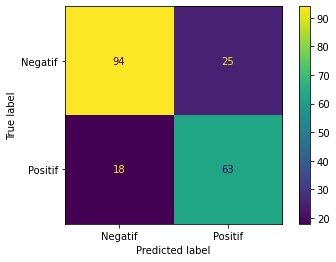

In [10]:
#performa algoritma naive bayes 
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

clf = MultinomialNB().fit(X_train, y_train)
predicted = clf.predict(X_test)
print("MultinomialNB Accuracy:" , accuracy_score(y_test, predicted))
print("MultinomialNB Precision:" , precision_score(y_test, predicted, average="binary", pos_label="Negatif" ))
print("MultinomialNB Recall:" , recall_score(y_test, predicted, average="binary", pos_label="Negatif" ))
print("MultinomialNB f1:" , f1_score(y_test, predicted, average="binary", pos_label="Negatif" ))
cm = confusion_matrix(y_test, predicted, labels=clf.classes_)
print(f'confusion matrix:\n {confusion_matrix(y_test, predicted)}')
print('================================================\n')
print(classification_report(y_test, predicted, zero_division=0))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from time import time

In [17]:
def accuracy_summary(pipeline, x_train, y_train, x_test, y_test):
    if len(x_test[y_test == 0]) / (len(x_test)*1.) > 0.5:
        null_accuracy = len(x_test[y_test == 0]) / (len(x_test)*1.)
    else:
        null_accuracy = 1. - (len(x_test[y_test == 0]) / (len(x_test)*1.))
    t0 = time()
    sentiment_fit = pipeline.fit(x_train, y_train)
    y_pred = sentiment_fit.predict(x_test)
    train_test_time = time() - t0
    accuracy = accuracy_score(y_test, y_pred)
    print ("null accuracy: {0:.2f}%".format(null_accuracy*100))
    print ("accuracy score: {0:.2f}%".format(accuracy*100))
    if accuracy > null_accuracy:
        print ("model is {0:.2f}% more accurate than null accuracy".format((accuracy-null_accuracy)*100))
    elif accuracy == null_accuracy:
        print ("model has the same accuracy with the null accuracy")
    else:
        print ("model is {0:.2f}% less accurate than null accuracy".format((null_accuracy-accuracy)*100))
    print ("train and test time: {0:.2f}s".format(train_test_time))
    print ("-"*80)
    return accuracy, train_test_time

cvec = CountVectorizer()
lr = LogisticRegression()
n_features = np.arange(10000,100001,10000)
def nfeature_accuracy_checker(vectorizer=cvec, n_features=n_features, stop_words=None, ngram_range=(1, 1), classifier=lr):
    result = []
    print (classifier)
    print ("\n")
    for n in n_features:
        vectorizer.set_params(stop_words=stop_words, max_features=n, ngram_range=ngram_range)
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', classifier)
        ])
        print ("Validation result for {} features".format(n))
        nfeature_accuracy,tt_time = accuracy_summary(checker_pipeline, x_train, y_train, x_validation, y_validation)
        result.append((n,nfeature_accuracy,tt_time))
    return result

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(text_tf, data_clean['class'], test_size=0.2, random_state = 42)

csv = 'E:/BAZNAS (BAZIS) DKI JAKARTA/Hanif/Salinan dari TAGS v6.1.9.1 - Archive (29).csv'
term_freq_df = pd.read_csv(csv,index_col=0)
term_freq_df.sort_values(by='class', ascending=False).iloc[:10]

from sklearn.feature_extraction import text
from sklearn.metrics import accuracy_score

a = frozenset(list(term_freq_df.sort_values(by='class', ascending=False).iloc[:10].index))
b = text.ENGLISH_STOP_WORDS
set(a).issubset(set(b))

my_stop_words = frozenset(list(term_freq_df.sort_values(by='class', ascending=False).iloc[:10].index))

print ("RESULT FOR UNIGRAM WITHOUT STOP WORDS\n")
feature_result_wosw = nfeature_accuracy_checker(stop_words='english')
print ("RESULT FOR UNIGRAM WITH STOP WORDS\n")
feature_result_ug = nfeature_accuracy_checker()
print ("RESULT FOR UNIGRAM WITHOUT CUSTOM STOP WORDS (Top 10 frequent words)\n")
feature_result_wocsw = nfeature_accuracy_checker(stop_words=my_stop_words)

RESULT FOR UNIGRAM WITHOUT STOP WORDS

LogisticRegression()


Validation result for 10000 features


NameError: name 'x_train' is not defined

In [19]:
nfeatures_plot_ug = pd.DataFrame(feature_result_ug,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_ug_wocsw = pd.DataFrame(feature_result_wocsw,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_ug_wosw = pd.DataFrame(feature_result_wosw,columns=['nfeatures','validation_accuracy','train_test_time'])
plt.figure(figsize=(8,6))
plt.plot(nfeatures_plot_ug.nfeatures, nfeatures_plot_ug.validation_accuracy, label='with stop words')
plt.plot(nfeatures_plot_ug_wocsw.nfeatures, nfeatures_plot_ug_wocsw.validation_accuracy,label='without custom stop words')
plt.plot(nfeatures_plot_ug_wosw.nfeatures, nfeatures_plot_ug_wosw.validation_accuracy,label='without stop words')
plt.title("Without stop words VS With stop words (Unigram): Accuracy")
plt.xlabel("Number of features")
plt.ylabel("Validation set accuracy")
plt.legend()

NameError: name 'feature_result_ug' is not defined

In [20]:
print ("RESULT FOR BIGRAM WITH STOP WORDS\n")
feature_result_bg = nfeature_accuracy_checker(ngram_range=(1, 2))
print ("RESULT FOR TRIGRAM WITH STOP WORDS\n")
feature_result_tg = nfeature_accuracy_checker(ngram_range=(1, 3))

RESULT FOR BIGRAM WITH STOP WORDS

LogisticRegression()


Validation result for 10000 features


NameError: name 'x_train' is not defined

In [21]:
nfeatures_plot_tg = pd.DataFrame(feature_result_tg,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_bg = pd.DataFrame(feature_result_bg,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_ug = pd.DataFrame(feature_result_ug,columns=['nfeatures','validation_accuracy','train_test_time'])
plt.figure(figsize=(8,6))
plt.plot(nfeatures_plot_tg.nfeatures, nfeatures_plot_tg.validation_accuracy,label='trigram')
plt.plot(nfeatures_plot_bg.nfeatures, nfeatures_plot_bg.validation_accuracy,label='bigram')
plt.plot(nfeatures_plot_ug.nfeatures, nfeatures_plot_ug.validation_accuracy, label='unigram')
plt.title("N-gram(1~3) test result : Accuracy")
plt.xlabel("Number of features")
plt.ylabel("Validation set accuracy")
plt.legend()

NameError: name 'feature_result_tg' is not defined